In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train.csv', index_col='NU_INSCRICAO')
test_data = pd.read_csv('test.csv', index_col='NU_INSCRICAO')
target = 'IN_TREINEIRO'

## Exploração dos dados

In [4]:
df = df[test_data.columns.to_list() + [target]]
df.head()

,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO
NU_INSCRICAO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,43,RS,24,M,1,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,1,1,1,1,436.3,495.4,581.2,1,1.0,120.0,120.0,120.0,80.0,80.0,520.0,D,D,C,A,A,C,H,A,0
2c3acac4b33ec2b195d77e7c04a2d75727fad723,23,CE,17,F,3,1,2,0,2,1.0,2.0,0,0,0,0,0,0,0,0,1,1,1,1,474.5,544.1,599.0,1,1.0,140.0,120.0,120.0,120.0,80.0,580.0,A,A,B,A,A,A,NaN,A,0
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568,23,CE,21,F,3,1,3,0,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,A,A,A,NaN,A,0
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe,33,RJ,25,F,0,1,1,9,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,H,E,E,C,B,C,F,D,0
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268,13,AM,28,M,2,1,1,4,1,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,D,C,A,A,B,F,A,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13730 entries, ed50e8aaa58e7a806c337585efee9ca41f1eb1ad to 0af8939c470a600b30bdaa80375ee0db848b0e35
Data columns (total 43 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CO_UF_RESIDENCIA        13730 non-null  int64  
 1   SG_UF_RESIDENCIA        13730 non-null  object 
 2   NU_IDADE                13730 non-null  int64  
 3   TP_SEXO                 13730 non-null  object 
 4   TP_COR_RACA             13730 non-null  int64  
 5   TP_NACIONALIDADE        13730 non-null  int64  
 6   TP_ST_CONCLUSAO         13730 non-null  int64  
 7   TP_ANO_CONCLUIU         13730 non-null  int64  
 8   TP_ESCOLA               13730 non-null  int64  
 9   TP_ENSINO               4282 non-null   float64
 10  TP_DEPENDENCIA_ADM_ESC  4282 non-null   float64
 11  IN_BAIXA_VISAO          13730 non-null  int64  
 12  IN_CEGUEIRA             13730 non-null  int64  
 13  IN_SURDEZ             

In [6]:
np.abs(df.corr()['IN_TREINEIRO']).sort_values(ascending=False)[1:]

TP_ST_CONCLUSAO           0.533983
NU_IDADE                  0.295091
TP_ANO_CONCLUIU           0.257710
TP_ESCOLA                 0.244562
TP_PRESENCA_CH            0.094692
                            ...   
IN_DISCALCULIA            0.003297
IN_DISLEXIA               0.003297
TP_ENSINO                      NaN
TP_DEPENDENCIA_ADM_ESC         NaN
IN_CEGUEIRA                    NaN
Name: IN_TREINEIRO, Length: 32, dtype: float64

Analisando os significados das variáveis com maior correlação, podemos ver:
![microdados](microdados.png)

Pelo `TP_ST_CONCLUSAO`, podemos inferir em quais candidatos podem estar aptos ou não a prestarem o ENEM "para valer". Incluí os casos em que não concluíram o Ensino Médio e não estão cursando pois podem haver os que se formaram no EJA.

In [7]:
df['APTO'] = (df['TP_ST_CONCLUSAO'] <= 2) | (df['TP_ST_CONCLUSAO'] == 4)
df['APTO'].head()

NU_INSCRICAO
ed50e8aaa58e7a806c337585efee9ca41f1eb1ad     True
2c3acac4b33ec2b195d77e7c04a2d75727fad723     True
f4545f8ccb9ff5c8aad7d32951b3f251a26e6568    False
3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe     True
bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268     True
Name: APTO, dtype: bool

Também podemos resumir `TP_ANO_CONCLUIU` entre concluiu ou não o EM.

In [8]:
df['CONCLUIU'] = df['TP_ANO_CONCLUIU'] > 0

Também é interessante analisar a influência da idade.

In [9]:
df['NU_IDADE'].describe()

count    13730.000000
mean        21.593809
std          7.043654
min         13.000000
25%         17.000000
50%         19.000000
75%         23.000000
max         67.000000
Name: NU_IDADE, dtype: float64

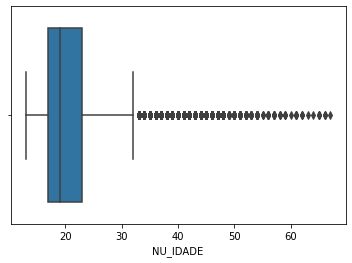

In [10]:
sns.boxplot(df['NU_IDADE'])

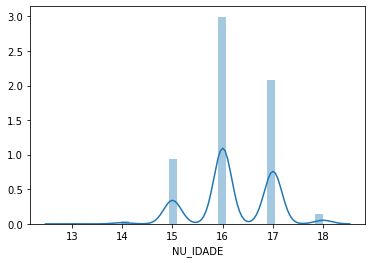

In [11]:
sns.distplot(df.loc[df['IN_TREINEIRO'] == 1, 'NU_IDADE'])

Não existe nenhum treineiro acima de 18 anos.

In [12]:
df['MAIOR'] = df['NU_IDADE'] > 18

In [13]:
features = [
    'APTO',
    'CONCLUIU',
    'MAIOR'
]

## Pré-processamento

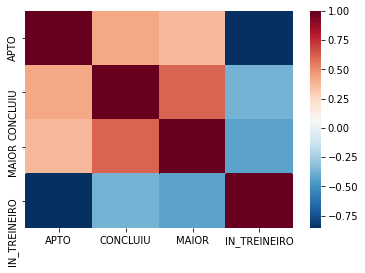

In [14]:
sns.heatmap(df[features+[target]].corr(), cmap='RdBu_r')

Existem algumas correlações entre as variáveis. É possível aplicar uma redução de dimensionalidade.

Apenas duas features são necessárias para explicar 99% da variância.

In [15]:
df[target].mean()

0.12986161689730516

O target é uma classe desbalanceada, onde apenas 13% dos candidatos se classificam como treineiros.

Desta forma, devemos aplicar algum algoritmo para balancear os dados.

In [16]:
X = df[features]
y = df[target]

sm = SMOTE()
X_balanced, y_balanced = sm.fit_resample(X, y)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2)

In [18]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2371   48]
 [   0 2360]]
0.9899328859060402


In [19]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2371   48]
 [   0 2360]]
0.9899328859060402


In [20]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2371   48]
 [   0 2360]]
0.9899328859060402


In [21]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2371   48]
 [   0 2360]]
0.9899328859060402


In [22]:
voter = VotingClassifier(
    [
        ('Logistic', lr_model),
        ('RandomForest', rf_model),
        ('KNeighbors', knn_model),
        ('NaiveBayes', nb_model),
    ],
    voting='soft'
)

voter.fit(X_train, y_train)
y_pred = voter.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f1_score(y_test, y_pred))

[[2371   48]
 [   0 2360]]
0.9899328859060402


Checando as entradas onde os modelos falharam:

In [23]:
X_test.loc[y_test != y_pred,].join(
    df, how='inner', lsuffix='_test'
)

,APTO_test,CONCLUIU_test,MAIOR_test,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,TP_DEPENDENCIA_ADM_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DISLEXIA,IN_DISCALCULIA,IN_SABATISTA,IN_GESTANTE,IN_IDOSO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047,IN_TREINEIRO,APTO,CONCLUIU,MAIOR


Como a interseção entre os dados balanceados e os dados originais é vazio, concluímos que apenas os dados artificiais geraram erro.

## Aplicando o modelo

In [24]:
test_data['APTO'] = (test_data['TP_ST_CONCLUSAO'] <= 2) | (test_data['TP_ST_CONCLUSAO'] == 4)
test_data['CONCLUIU'] = test_data['TP_ANO_CONCLUIU'] > 0
test_data['MAIOR'] = test_data['NU_IDADE'] > 18
X_test = test_data[features]
X_test

,APTO,CONCLUIU,MAIOR
NU_INSCRICAO,,,
ba0cc30ba34e7a46764c09dfc38ed83d15828897,True,True,True
177f281c68fa032aedbd842a745da68490926cd2,True,True,True
6cf0d8b97597d7625cdedc7bdb6c0f052286c334,False,False,False
5c356d810fa57671402502cd0933e5601a2ebf1e,True,False,False
df47c07bd881c2db3f38c6048bf77c132ad0ceb3,True,True,True
...,...,...,...
361b7fcd8867119550fe2af5aa729ffad89a7cf5,True,False,False
d8a0e4c9e29494cc9bba2422bd79333931475ee1,True,True,True
3f1c3388244df8d6521e983a809292d9f3bca643,True,True,True


In [25]:
y_pred = voter.predict(X_test)
answer = pd.DataFrame(data={'IN_TREINEIRO': y_pred}, index=X_test.index)

In [26]:
answer.head(10)

,IN_TREINEIRO
NU_INSCRICAO,
ba0cc30ba34e7a46764c09dfc38ed83d15828897,0
177f281c68fa032aedbd842a745da68490926cd2,0
6cf0d8b97597d7625cdedc7bdb6c0f052286c334,1
5c356d810fa57671402502cd0933e5601a2ebf1e,0
df47c07bd881c2db3f38c6048bf77c132ad0ceb3,0
3f28749fb79fb059caf5aed79625a5addfd7a91a,0
bb2a0edddf3c59181a1496390aaaee7f32624d9d,1
cc7cab347fe5455aae983f3701ca40f84dc01949,0
95e9338f1da02f7bfa0e3194130afdccc0fb5457,1


In [27]:
answer.describe()

,IN_TREINEIRO
count,4570.000000
mean,0.138731
std,0.345703
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [28]:
answer.to_csv('answer.csv')